# DCS 540 Data Preparation (DSC540-T301 2225-1)
## Bellevue University
## Assignment: Weeks 5 & 6 Exercises
## Author: Jake Meyer
## Date: 04/19/2022

## Assignment Instructions:
1. Data Wrangling with Python: Activity 7, page 207
2. Data Wrangling with Python: Activity 8, page 233
3. Insert data into a SQL Lite database - create a table with the following data (Hint: *Python for Data Analysis Page 191*):
* a. Name, Address, City, State, Zip, Phone Number.
* b. Add at least 10 rows of data and submit your code with a query generating your results.

## 1. Data Wrangling with Python: Activity 7, page 207

In [243]:
'''
Import the necessary libraries to complete Activity 7.
Essential libraries found in Data Wrangling with Python Text (Page 177).
Other libraries that will be installed for this activity will be NumPy, Pandas, BeautifulSoup, and Requests.
''' 
# !apt-get update - not recognized - not using Linux

# !apt-get install -y default-jdk - not using Linux

!pip install tabula-py xlrd lxml

!pip install openpyxl

import numpy as np

import pandas as pd

from bs4 import BeautifulSoup

import requests

In [244]:
'''
The alternative link: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) contains
one consolidated table.
For Assignment 7, I'll be using the List of countries by GDP (nominlal) - Wikepedia.htm
located from the GitHub repository for Data Wrangling with Python.
Move a copy of the List of countries by GDP (nominlal) - Wikepedia.htm 
file from the text GitHub repository into the current working directory. 
GitHub repository for text is:
https://github.com/TrainingByPackt/Data-Wrangling-with-Python/tree/master/Chapter05/Activity07
Read the file using BeautifulSoup and print type.
Parser will be 'lxml'.
'''

with open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding ='utf-8') as fd:
    soup = BeautifulSoup(fd, 'lxml')
    print(type(soup))

<class 'bs4.BeautifulSoup'>


In [245]:
'''
Print the contents of the web file to understand what is being reviewed.
Use prettify() to review the contents in an easy to read format.
'''
print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0064)https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) -->
<html class="client-js gr__en_wikipedia_org ve-not-available" dir="ltr" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   List of countries by GDP (nominal) - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":861281423,"wgRevisionId":861281423,"wgArticleId":380845,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using Timeline","Wikipedia indefinitely semi-protected p

In [246]:
'''
Find all the tables in the "List of countries by GDP (nominal) - Wikipedia.htm" file.
Page 200-201 of Data Wrangling with Python provides examples of find_all('') and soup.table. 
'''
all_tables = soup.find_all('table')
print("There are {} tables in this file.".format(len(all_tables)))

There are 9 tables in this file.


In [247]:
'''
View the contents of these 9 tables individually.
Create a dictionary with table names and index numbers identified.
Create a loop to store the tables 0-8.
'''
tableName_dict={'table_one': 0, 'table_two': 1,'table_three': 2, 'table_four': 3,
               'table_five': 4, 'table_six': 5,'table_seven': 6, 'table_eight': 7,
               'table_nine': 8}

table = soup.find('table')

for key,val in tableName_dict.items():
    table[key] = all_tables[val].contents
    

In [248]:
'''
Go through the 9 tables to review the contents. Table one.
'''
table['table_one']

['\n',
 <tbody><tr>
 <td><div class="timeline-wrapper"><map name="timeline_45cabf722ffec5de02631bda1f6ccce0"></map><img src="./List of countries by GDP (nominal) - Wikipedia_files/45cabf722ffec5de02631bda1f6ccce0.png" usemap="#timeline_45cabf722ffec5de02631bda1f6ccce0"/></div>
 </td></tr>
 <tr>
 <td style="text-align:center; font-size:100%;">Largest economies by nominal GDP in 2017<sup class="reference" id="cite_ref-GDP_IMF_1-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
 </td></tr></tbody>]

In [249]:
'''
Go through the 9 tables to review the contents. Table two.
'''
table['table_two']

['\n',
 <tbody><tr>
 <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
 </td>
 <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">World Bank</a> (2017)</b><sup class="reference" id="cite_ref-worldbank_20-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">[20]</a></sup>
 </td>
 <td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/United_Nations" title="United Nations">United Nations</a> (2016)</b><sup class="reference" id="cite_ref-21"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-21">[21]<

In [250]:
'''
Go through the 9 tables to review the contents. Table three.
'''
table['table_three']

['\n',
 <thead><tr>
 <th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
 <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country</th>
 <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$MM)
 </th></tr></thead>,
 <tbody>
 <tr style="font-weight:bold;background:#eaecf0">
 <td data-sort-value="-1"> </td>
 <td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_19-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-19">[19]</a></sup></td>
 <td align="right">79,865,481
 </td></tr>
 <tr>
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file

In [251]:
'''
Go through the 9 tables to review the contents. Table four.
'''
table['table_four']

['\n',
 <thead><tr>
 <th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
 <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country</th>
 <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$MM)
 </th></tr></thead>,
 <tbody>
 <tr style="font-weight:bold;background:#eaecf0">
 <td data-sort-value="-1"> </td>
 <td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i></td>
 <td align="right"><span class="sortkey" style="display:none">7007806837870000000♠</span>80,683,787
 </td></tr>
 <tr>
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_

In [252]:
'''
Go through the 9 tables to review the contents. Table five.
'''
table['table_five']

['\n',
 <thead><tr>
 <th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
 <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country</th>
 <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$MM)
 </th></tr></thead>,
 <tbody>
 <tr style="font-weight:bold;background:#eaecf0">
 <td data-sort-value="-1"> </td>
 <td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-UN_33-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-UN-33">[24]</a></sup></td>
 <td align="right"><span class="sortkey" style="display:none">7007756484480000000♠</span>75,648,448
 </td></tr>
 <tr style="">
 <td align="right">1</td>
 <td><span class="flagicon"><

In [253]:
'''
Go through the 9 tables to review the contents. Table six.
'''
table['table_six']

[<tbody><tr><th class="navbox-title" colspan="2" scope="col"><span class="mw-collapsible-toggle mw-collapsible-toggle-default" role="button" tabindex="0"><a class="mw-collapsible-text">hide</a></span><div class="plainlinks hlist navbar mini"><ul><li class="nv-view"><a href="https://en.wikipedia.org/wiki/Template:GDP_country_lists" title="Template:GDP country lists"><abbr style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;" title="View this template">v</abbr></a></li><li class="nv-talk"><a href="https://en.wikipedia.org/wiki/Template_talk:GDP_country_lists" title="Template talk:GDP country lists"><abbr style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;" title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:GDP_country_lists&amp;action=edit"><abbr style="

In [254]:
'''
Go through the 9 tables to review the contents. Table seven.
'''
table['table_seven']

[<tbody><tr><th class="navbox-title" colspan="2" scope="col"><span class="mw-collapsible-toggle mw-collapsible-toggle-default mw-collapsible-toggle-collapsed" role="button" tabindex="0"><a class="mw-collapsible-text">show</a></span><div class="plainlinks hlist navbar mini"><ul><li class="nv-view"><a href="https://en.wikipedia.org/wiki/Template:Finance_country_lists" title="Template:Finance country lists"><abbr style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;" title="View this template">v</abbr></a></li><li class="nv-talk"><a href="https://en.wikipedia.org/wiki/Template_talk:Finance_country_lists" title="Template talk:Finance country lists"><abbr style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;" title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:

In [255]:
'''
Go through the 9 tables to review the contents. Table eight.
'''
table['table_eight']

[<tbody><tr><th class="navbox-title" colspan="2" scope="col"><span class="mw-collapsible-toggle mw-collapsible-toggle-default mw-collapsible-toggle-collapsed" role="button" tabindex="0"><a class="mw-collapsible-text">show</a></span><div class="plainlinks hlist navbar mini"><ul><li class="nv-view"><a href="https://en.wikipedia.org/wiki/Template:Global_economic_classifications" title="Template:Global economic classifications"><abbr style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;" title="View this template">v</abbr></a></li><li class="nv-talk"><a href="https://en.wikipedia.org/wiki/Template_talk:Global_economic_classifications" title="Template talk:Global economic classifications"><abbr style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;" title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.w

In [256]:
'''
Go through the 9 tables to review the contents. Table nine.
'''
table['table_nine']

[<tbody><tr><th class="navbox-group" scope="row" style="width:1%"><a href="https://en.wikipedia.org/wiki/Gross_domestic_product#Nominal_GDP_and_adjustments_to_GDP" title="Gross domestic product">Nominal</a></th><td class="navbox-list navbox-even" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
 <ul><li><a class="mw-selflink selflink">By country</a>
 <ul><li><a class="mw-redirect" href="https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_GDP_(nominal)" title="List of countries by past and future GDP (nominal)">past and projected</a>
 <ul><li><a class="mw-redirect" href="https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_GDP_(nominal)_per_capita" title="List of countries by past and future GDP (nominal) per capita">per capita</a></li></ul></li>
 <li><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita" title="List of countries by GDP (nominal) per c

In [258]:
'''
Assignment requests to find the "right" table using bs4.
Using the .htm file, right click on the table of interest and select inspect.
The contents of the table were inherited from table class='"wikitable"|}'.
The table appears to be table['table_two'] after reviewing the outputs above.
However, I'll use this class detail and find() method to identify/label the table as wiki_table.
'''
wiki_table = soup.find('table', {"class":'"wikitable"|}'})  

In [260]:
'''
Print the wiki_table type.
The type will show up as a "Tag" from bs4.
'''
print(type(wiki_table))

<class 'bs4.element.Tag'>


In [261]:
'''
Show the contents within the table of interest using the prettify() method.
'''
print(wiki_table.prettify())

<table class='"wikitable"|}' style="margin:auto; width:100%;">
 <tbody>
  <tr>
   <td style="width:33%; text-align:center;">
    <b>
     Per the
     <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">
      International Monetary Fund
     </a>
     (2017)
    </b>
    <sup class="reference" id="cite_ref-GDP_IMF_1-2">
     <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">
      [1]
     </a>
    </sup>
   </td>
   <td style="width:33%; text-align:center;">
    <b>
     Per the
     <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">
      World Bank
     </a>
     (2017)
    </b>
    <sup class="reference" id="cite_ref-worldbank_20-0">
     <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">
      [20]
     </a>
    </sup>
   </td>
   <td style="width:33%; text-align:center;">
    <b>
     Per the
     <a href="https://en

In [262]:
'''
Per the assignment, separate out the source names and corresponding data in a list.
The three sources are International Monetary Fund, World Bank, and United Nations as seen in the file
or in the "prettified" source code in the output above.
Use find_all with a for loop to find the three sources within the table.
'''
# Use the source code "inspect" to see that the table source will be located under elements <tbody>, ,<tr>, and <td>.
# The source codes are located under <tr> index item 0 (under <tbody> element) after inspecting from the file.
sources = wiki_table.tbody.find_all('tr', recursive=False)[0]

# Setup a for loop to list the three source identified under the <tr> element section. 
# The source codes separated are located under element <td>. 
source_list = []

for td in sources.find_all('td'):
    source_list.append('td')

print(source_list)
    

['td', 'td', 'td']


In [263]:
'''
source_list contains the three identified sources.  
'''
print("There are {} sources.".format(len(source_list)))

There are 3 sources.


In [264]:
'''
Print the names of the 3 sources.
Find each source text and then place the names in a list to print.
There is a second <a> element under each <td> which is why the indexes will be [0], [2], [4]
'''
source_name1 = sources.find_all('a')[0].getText()
source_name2 = sources.find_all('a')[2].getText()
source_name3 = sources.find_all('a')[4].getText()

source_names = [source_name1, source_name2, source_name3]

print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [265]:
'''
Use find_all for <td> element within the wiki_table body tag. Requires another 
step to go through the <tr> element (index item 1) within the wiki_table body tag.
'''
# Step 1 will consist of finding the <tr> element within the wiki_table body tag.
data_step1 = wiki_table.tbody.find_all('tr', recursive = False)[1]

# Step 2 will consist of finding the <td> elements. Data is stored within these <td> tags.
data = data_step1.find_all('td', recursive = False)

In [266]:
'''
Store the data elements <td> in a list called data_tables.
Use a for loop to create the list of tables.
Print out the length of the list to determine the number of tables.
'''
data_tables = []

for td in data:
    data_tables.append(td.find_all('table'))
    
print("There are {} tables of data.".format(len(data_tables)))

There are 3 tables of data.


In [268]:
'''
Show the contents of the data_tables list.
Useful for understanding what is stored under data_tables.
Use this output below and compare against the file with "inspect" to understand next steps.
'''
data_tables

[[<table class="wikitable sortable jquery-tablesorter" style="margin-left:auto; margin-right:auto; margin-top:0;">
  <thead><tr>
  <th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
  <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country</th>
  <th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$MM)
  </th></tr></thead><tbody>
  <tr style="font-weight:bold;background:#eaecf0">
  <td data-sort-value="-1"> </td>
  <td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_19-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-19">[19]</a></sup></td>
  <td align="right">79,865,481
  </td></tr>
  <tr>
  

In [272]:
'''
Per the assignment, separate the header and data from the first source and store in a DataFrame.
'''
# for th in data_tables[0][0].find_all('thead')[0].find_all('th'): - code does not work
#    header1 = th.getText().strip() - code does not work
# header1 - code does not work

# Create header1 by using strip() for the headers located under <thead> in the <th> elements.
# Use list comprehension and slicing with the correct indexes from data_tables.
# Use getText() on <th> element to return the strings stored under each header.
header1 = [th.getText().strip() for th in data_tables[0][0].find_all('thead')[0].find_all('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [273]:
'''
Use the following code to find the rows from data_tables.
Use find_all() along with propper indexes to return rows1.
'''
# Use list comprehension and slicing with the correct indexes from data tables.
# Find the initial rows of data under and store under rows1.
# Use find_all() with the <tbody> and <tr> elements.
rows1 = data_tables[0][0].find_all('tbody')[0].find_all('tr')[1:]
rows1

[<tr>
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
 <td align="right">19,390,600
 </td></tr>,
 <tr>
 <td align="right">2</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_People's_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_Peop

In [274]:
'''
Use getText() under element <td> within <tr> elements identified in rows1.
'''
data_rows1 = [[td.getText().strip() for td in tr.find_all('td')] for tr in rows1]

In [275]:
'''
Use pd.DataFrame() with data_rows1 and header1 to create dataframe1 for the first table.
'''
dataframe1 = pd.DataFrame(data_rows1, columns=header1)
dataframe1.head(10)

Rank         Country  GDP(US$MM)
0    1   United States  19,390,600
1    2      China[n 1]  12,014,610
2    3           Japan   4,872,135
3    4         Germany   3,684,816
4    5  United Kingdom   2,624,529
5    6           India   2,611,012
6    7          France   2,583,560
7    8          Brazil   2,054,969
8    9           Italy   1,937,894
9   10          Canada   1,652,412

In [277]:
'''
Separate the header and data from the second source and store in a DataFrame.
Repeat the previous steps outlined for header1, except change the location within
data_tables to find the headers of the second table.
Store under the variable header2.
'''
header2 = [th.getText().strip() for th in data_tables[1][0].find_all('thead')[0].find_all('th')]

header2

['Rank', 'Country', 'GDP(US$MM)']

In [276]:
'''
Use the following code to find the second table rows from data_tables.
Use find_all() along with propper indexes to return rows2 similar to the previous step for rows1.
Only modify the location under data_tables to find the location for the second table rows.
'''
rows2 = data_tables[1][0].find_all('tbody')[0].find_all('tr')[1:]
rows2

[<tr>
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
 <td align="right"><span class="sortkey" style="display:none">7007193906040000000♠</span>19,390,604
 </td></tr>,
 <tr style="background-color:#eaecf0">
 <td align="right" data-sort-value="0"> </td>
 <td><i><span class="flagicon"><img alt="" class="thumbborder" data-file-height="540" data-file-width="810" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23p

In [111]:
'''
Create a function that will locate the targeted text and use strip() on the strings to 
return the intended words.
Notice the "♠" from the output shown in the previous step.
'''
def find_text(i, td):
    if i==0:
        return td.getText().strip()
    elif i ==1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [278]:
'''
Use the find_text(i,td) function in rows 2 to store the data in a variable called data_rows2.
'''
data_rows2 = [[find_text(i,td) for i,td in enumerate(tr.find_all('td'))] for tr in rows2]

In [113]:
'''
Use data_rows2 and header2 with pd.DataFrame() to create dataframe2 for the second table.
'''
dataframe2 = pd.DataFrame(data_rows2, columns=header2)
dataframe2.head(10)

Rank             Country  GDP(US$MM)
0    1       United States  19,390,604
1       European Union[23]  17,277,698
2    2          China[n 4]  12,237,700
3    3               Japan   4,872,137
4    4             Germany   3,677,439
5    5      United Kingdom   2,622,434
6    6               India   2,597,491
7    7              France   2,582,501
8    8              Brazil   2,055,506
9    9               Italy   1,934,798

In [114]:
'''
Separate the header and data from the third source and store in a DataFrame.
Repeat the previous steps outlined for header1 and header2, except change the location within
data_tables to find the headers of the third table.
Store under the variable header3.
'''
header3 = [th.getText().strip() for th in data_tables[2][0].find_all('thead')[0].find_all('th')]

header3

['Rank', 'Country', 'GDP(US$MM)']

In [280]:
'''
Use the following code to find the rows from data_tables.
Use find_all() along with propper indexes to return rows3 similar to the previous step for rows1 and rows2.
Only modify the location under data_tables to find the location for the third table rows.
'''

rows3 = data_tables[2][0].find_all('tbody')[0].find_all('tr')[1:]
rows3

[<tr style="">
 <td align="right">1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/United_States" title="United States">United States</a></td>
 <td align="right"><span class="sortkey" style="display:none">7007186244750000000♠</span>18,624,475
 </td></tr>,
 <tr>
 <td align="right">2</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_the_People's_Republic_of_China.svg.pn

In [281]:
'''
Use the find_text(i,td) function in rows 3 to store the data in a variable called data_rows3.
'''

data_rows3 = [[find_text(i,td) for i,td in enumerate(tr.find_all('td'))] for tr in rows3]

In [282]:
'''
Use data_rows3 and header3 with pd.DataFrame() to create dataframe3 for the third table.
'''
dataframe3 = pd.DataFrame(data_rows3, columns=header3)
dataframe3.head(10)

Rank         Country  GDP(US$MM)
0    1   United States  18,624,475
1    2      China[n 4]  11,218,281
2    3           Japan   4,936,211
3    4         Germany   3,477,796
4    5  United Kingdom   2,647,898
5    6          France   2,465,453
6    7           India   2,259,642
7    8           Italy   1,858,913
8    9          Brazil   1,795,925
9   10          Canada   1,529,760

In [283]:
'''
Not part of the assignment, just wanted additional practice for an alternate approach for this Activity 7.
Attempt to read the data tables from the file using read_html().
'''
# install html5lib
import html5lib

# Read the tables from the .htm file from GitHub and print how many tables.
tables_var = pd.read_html('List of countries by GDP (nominal) - Wikipedia.htm',)
print('There are {} tables in the file.'.format(len(tables_var)))

There are 9 tables in the file.


In [286]:
'''
Not part of the assignment.
Index through the tables to see which table is the one of interest.
'''
tables_var[1]

Rank  \
                                                  Rank   
                                                  Rank   
0        Per the International Monetary Fund (2017)[1]   
1    Rank Country GDP(US$MM)  World[19] 79,865,481 ...   
2                                                 Rank   
3                                                  NaN   
4                                                    1   
..                                                 ...   
594                                                207   
595                                                208   
596                                                209   
597                                                210   
598                                                211   

                                               Country  \
                                               Country   
                                               Country   
0                        Per the World Bank (2017)[20]   
1    Rank Country GDP(US$MM)  World 1  United State...   
2                                              Country   
3                                            World[19]   
4                                        United States   
..                                                 ...   
594                                   Marshall Islands   
595                                              Nauru   
596                                           Kiribati   
597                                         Montserrat   
598                                             Tuvalu   

                                            GDP(US$MM)  
                                            GDP(US$MM)  
                                            GDP(US$MM)  
0                Per the United Nations (2016)[21][22]  
1    Rank Country GDP(US$MM)  World[24] 1  United S...  
2                                           GDP(US$MM)  
3                                             79865481  
4                                             19390600  
..                                                 ...  
594                                                NaN  
595                                                NaN  
596                                                NaN  
597                                                NaN  
598                                                NaN  

[599 rows x 3 columns]

In [287]:
'''
Not part of the assignment.
This could be an alternate way to read the  table of interest from the wikipedia file or site.
It may be useful to skip the first three rows since the table is returning a little strange.
This is as far as I will take this alternate method, but do believe this way
of using html_read() and slicing for the essential columns/rows would work as well.
'''

'\nNot part of the assignment.\nThis could be an alternate way to read the  table of interest from the wikipedia file or site.\nIt may be useful to skip the first three rows since the table is returning a little strange.\nThis is as far as I will take this alternate method, but do believe this way\nof using html_read() and slicing for the essential columns/rows would work as well.\n'

In [288]:
'''
Not part of the assignment, just wanted practice reading data directly from the site rather than a file.
I will use requests.get() and BeautifulSoup() with lxml parser.)
'''
source = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)').text
soup2 = BeautifulSoup(source, 'lxml')


In [289]:
'''
Not part of the assignment, just wanted practice working from the website rather than a file.
This code will print the easy to read html code directly from the site.
'''
print(soup2.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by GDP (nominal) - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b467179f-6164-4ce5-b40d-decc5e984971","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":1082723552,"wgRevisionId":1082723552,"wgArticleId":380845,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using the EasyTimeline extension","Articles with short description"

## 2. Data Wrangling with Python: Activity 8, page 233

In [290]:
'''
Import the essential libraries to complete Activity 8. 
Some libraries were previously loaded in Activity 7 (pandas and numpy).
Will import matplotlib.pyplot for the boxplot.
'''
import matplotlib.pyplot as plt

from scipy import stats

In [291]:
'''
Move a copy of the visit_data.csv file into the same working directory as this file.
The CSV file is located at: 
https://github.com/TrainingByPackt/Data-Wrangling-with-Python/tree/master/Lesson06/Activity08
Read the csv file with the code below and store as df1. 
'''
df1 = pd.read_csv('visit_data.csv')
df1.head(5)

id first_name last_name                       email gender  \
0   1      Sonny      Dahl            sdahl0@mysql.com   Male   
1   2        NaN       NaN           dhoovart1@hud.gov    NaN   
2   3        Gar     Armal      garmal2@technorati.com    NaN   
3   4    Chiarra     Nulty       cnulty3@newyorker.com    NaN   
4   5        NaN       NaN  sleaver4@elegantthemes.com    NaN   

        ip_address   visit  
0    135.36.96.183  1225.0  
1  237.165.194.143   919.0  
2   166.43.137.224   271.0  
3   139.98.137.108  1002.0  
4    46.117.117.27  2434.0

In [292]:
'''
Understand the shape of the DataFrame initially.
'''
print('There are {} rows and {} columns in the DataFrame.'.format(df1.shape[0],df1.shape[1]))

There are 1000 rows and 7 columns in the DataFrame.


In [293]:
'''
The next step will be to check for duplicate values.
Duplicates will be checked on the following columns: 
'first_name','last_name', and 'email' using the duplicated() command.
Start with 'first_name' column.
'''
first_dup = df1['first_name'].duplicated()
first_dupnum = first_dup[first_dup == True].count()

print('first_name column duplicates = {}.\nTotal count of duplicates = {}.'.format(first_dup.any(),first_dupnum))


first_name column duplicates = True.
Total count of duplicates = 320.


In [294]:
'''
Check for duplicates in the 'last_name' column.
'''
last_dup = df1['last_name'].duplicated()
last_dupnum = last_dup[last_dup == True].count()

print('last_name column duplicates = {}.\nTotal count of duplicates = {}.'.format(last_dup.any(),last_dupnum))


last_name column duplicates = True.
Total count of duplicates = 299.


In [295]:
'''
Check for duplicates in the 'email' column.
'''
email_dup = df1['email'].duplicated()
email_dupnum = email_dup[email_dup == True].count()

print('email column duplicates = {}.\nTotal count of duplicates = {}.'.format(email_dup.any(),email_dupnum))

email column duplicates = False.
Total count of duplicates = 0.


In [296]:
'''
Check if any columns contain NaN values.
Use isna() and any() to determine if there are NaN values in each column.
'''
df1.isna().any()

id            False
first_name     True
last_name      True
email         False
gender         True
ip_address    False
visit          True
dtype: bool

In [297]:
'''
The columns with NaN values are: 
'first_name', 'last_name', 'gender', and 'visit'.
Get a count of the number of NaN values in each column.
'''
df1.isna().sum()

id              0
first_name    296
last_name     296
email           0
gender        505
ip_address      0
visit          26
dtype: int64

In [298]:
'''
Column of interest is 'visit'.
Remove the rows with the NaN values in visit (QTY 26 as seen above).
The cleaned data will be stored under df2 DataFrame.
'''
# visit_clean = df1['visit'].dropna() - code initially used to review dropping NaN values. Not used.
# len(visit_clean) - code initially used to review length of revised visit column. Not used.
# Decided to create a new DataFrame with the rows removed for the 26 NaN values in the 'visit' column.

df2 = df1[df1['visit'].isna() == False]
df2.shape
print('There are {} rows and {} columns in the DataFrame.'.format(df2.shape[0],df2.shape[1]))

There are 974 rows and 7 columns in the DataFrame.


In [299]:
'''
Per the assignment, report the size difference after the NaN values were removed.
Subtract the length of the df1 from df2 based on the number of rows.
'''
difference = df1['visit'].shape[0] - df2['visit'].shape[0]
print('The difference in size is {} rows.'.format(difference))

The difference in size is 26 rows.


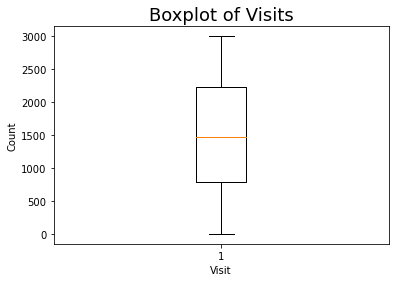

In [300]:
'''
Check for outliers using a boxplot.
Use the plt.boxplot() function to chart the df2['visit'] data.
'''
plt.boxplot(df2['visit'])
plt.title("Boxplot of Visits", fontsize=18)
plt.xlabel("Visit")
plt.ylabel("Count")
plt.show()

In [301]:
'''
Check if the visits are normally distributed.
Use stats.normaltest().
Reject the hypothesis that the data is normally distributed. Will not use Z-score.
'''
print(stats.normaltest(df2['visit']))

NormaltestResult(statistic=504.7320517671022, pvalue=2.5051142588047853e-110)


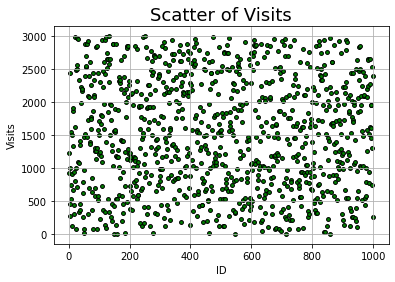

In [302]:
'''
The boxplot shows that outliers fall above 2900 and below 100.
This section of code will create a scatter plot showing the data.
Hope to use visual plot to identify any obvious outliers.
'''
df2.plot.scatter('id', 'visit', s=15, c='green', edgecolor='k')
plt.grid(True) # Places a grid onto the plot.
plt.title("Scatter of Visits", fontsize=18)
plt.xlabel("ID")
plt.ylabel("Visits")
plt.show()

In [303]:
'''
Remove the outliers by creating a DataFrame for data with visits between 100 to 2900.
The DataFrame will be labeled df3 and the size will be reported.
'''
df3 = df2[(df2['visit'] < 2900) & (df2['visit'] > 100)] 
print('The revised number of rows in the DataFrame is {}.'.format(df3.shape[0]))

The revised number of rows in the DataFrame is 923.


In [304]:
'''
Determine number of data points removed from DataFrame.
'''
difference2 = df2['visit'].shape[0] - df3['visit'].shape[0]
print('The difference in size is {} rows.'.format(difference2))

The difference in size is 51 rows.


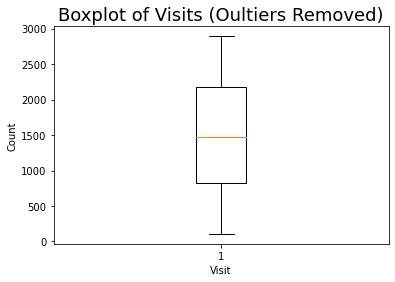

In [305]:
'''
Replot the boxplot to see if anything has significantly changed with the 51 data points removed.
Use the plt.boxplot() function to chart the df3['visit'] data.
'''
plt.boxplot(df3['visit'])
plt.title("Boxplot of Visits (Oultiers Removed)", fontsize=18)
plt.xlabel("Visit")
plt.ylabel("Count")
plt.show()

## 3. Insert data into a SQL Lite database - create a table with the following data:
* a. Name, Address, City, State, Zip, Phone Number.
* b. Add at least 10 rows of data and submit your code with a query generating your result.

In [338]:
'''
Used Python for Data Analysis (Pages 191-193 for examples).
In addition, reviewed Corey Schafer's video for reference:
https://www.youtube.com/watch?v=pd-0G0MigUA.
Import necessary library to complete Exercise 3.
'''
import sqlite3

In [339]:
'''
Connection object that represents our database.
Database will be called address.db.
'''
conn = sqlite3.connect('address.db')

In [340]:
'''
Create a cursor to execute sql commands.
'''
c = conn.cursor()

In [341]:
'''
Start running sql commands using execute method.
Create a table for the address data.
'''
# c.execute("DROP TABLE IF EXISTS addresses") - dropped from previous attempt to create table. No longer need.
c.execute("DROP TABLE IF EXISTS address")
c.execute("""CREATE TABLE address (
            name text,
            address text,
            state text,
            zip integer,
            phone_number text
            )""")

In [342]:
'''
Commit the connection for the current transaction of the table setup.
'''
conn.commit()
# conn.close() - initially closed the database and ran into issues trying to execute commands.

In [343]:
'''
Insert the data into the address database.
Create a minimum of 10 rows of data per the assignment.
Data is made-up for the purposes of the assignment.
Commit the connection for the insertion of the values into addresses.
'''
c.execute("INSERT INTO address VALUES ('John Doe','123 Madeup Lane','OH','13579','213-525-1432')")
c.execute("INSERT INTO address VALUES ('Jane Doe','456 Newers Street','CO','89029','219-493-2930')")
c.execute("INSERT INTO address VALUES ('Ken Johnson','789 Old Street','FL','73283','845-540-0293')")
c.execute("INSERT INTO address VALUES ('Ally Wong','304 Uptown Street','NE','38489','384-392-0309')")
c.execute("INSERT INTO address VALUES ('Jaimie Kindle','203 Foster Drice','CA','38804','475-383-3988')")
c.execute("INSERT INTO address VALUES ('Kelvin Mitchell','3509 Downtown Way','NY','21909','495-038-3838')")
c.execute("INSERT INTO address VALUES ('Newton Mitchell','3509 Downtown Way','NY','21909','384-319-9873')")
c.execute("INSERT INTO address VALUES ('Jason Mayer','2109 Navigation Drive','CO','29129','126-342-9848')")
c.execute("INSERT INTO address VALUES ('Barb Newman','450 Ashton Drive','NE','18390','203-392-1837')")
c.execute("INSERT INTO address VALUES ('Stew Laymen','903 Fake Street','NM','79892','902-209-9209')")

conn.commit()

In [344]:
'''
Query for a particular value located in the address database.
Will print out the first row after querying for John Doe.
Accidentally ran the code above twice, so now there will be duplicates of each value.
'''
c.execute("SELECT * FROM address WHERE name=:name", {'name':"John Doe"})
print(c.fetchall())

[('John Doe', '123 Madeup Lane', 'OH', 13579, '213-525-1432')]


In [345]:
"""
Create a variable called rows to return all the columns in the address database.
"""
cursor = conn.execute('SELECT * FROM address')
rows = cursor.fetchall()
rows

[('John Doe', '123 Madeup Lane', 'OH', 13579, '213-525-1432'),
 ('Jane Doe', '456 Newers Street', 'CO', 89029, '219-493-2930'),
 ('Ken Johnson', '789 Old Street', 'FL', 73283, '845-540-0293'),
 ('Ally Wong', '304 Uptown Street', 'NE', 38489, '384-392-0309'),
 ('Jaimie Kindle', '203 Foster Drice', 'CA', 38804, '475-383-3988'),
 ('Kelvin Mitchell', '3509 Downtown Way', 'NY', 21909, '495-038-3838'),
 ('Newton Mitchell', '3509 Downtown Way', 'NY', 21909, '384-319-9873'),
 ('Jason Mayer', '2109 Navigation Drive', 'CO', 29129, '126-342-9848'),
 ('Barb Newman', '450 Ashton Drive', 'NE', 18390, '203-392-1837'),
 ('Stew Laymen', '903 Fake Street', 'NM', 79892, '902-209-9209')]

In [346]:
'''
Find the column_names setup in the database.
'''
column_names = [x[0] for x in cursor.description]
column_names

['name', 'address', 'state', 'zip', 'phone_number']

In [347]:
'''
Create a DataFrame, df4, that contains the data from address.db.
'''
df4 = pd.DataFrame(rows, columns=column_names)
df4

name                address state    zip  phone_number
0         John Doe        123 Madeup Lane    OH  13579  213-525-1432
1         Jane Doe      456 Newers Street    CO  89029  219-493-2930
2      Ken Johnson         789 Old Street    FL  73283  845-540-0293
3        Ally Wong      304 Uptown Street    NE  38489  384-392-0309
4    Jaimie Kindle       203 Foster Drice    CA  38804  475-383-3988
5  Kelvin Mitchell      3509 Downtown Way    NY  21909  495-038-3838
6  Newton Mitchell      3509 Downtown Way    NY  21909  384-319-9873
7      Jason Mayer  2109 Navigation Drive    CO  29129  126-342-9848
8      Barb Newman       450 Ashton Drive    NE  18390  203-392-1837
9      Stew Laymen        903 Fake Street    NM  79892  902-209-9209

In [348]:
'''
Attempt to use sqlalchemy to read from the addresses.db setup in the steps above.
Import sqlalchemy as sqla
'''
import sqlalchemy as sqla

In [349]:
'''
Store the table of data created previously from address.db in address_db.
'''
address_db = sqla.create_engine('sqlite:///address.db')

In [350]:
'''
Read the data from address_db using read_sql().
'''
pd.read_sql('SELECT * FROM address',address_db)

name                address state    zip  phone_number
0         John Doe        123 Madeup Lane    OH  13579  213-525-1432
1         Jane Doe      456 Newers Street    CO  89029  219-493-2930
2      Ken Johnson         789 Old Street    FL  73283  845-540-0293
3        Ally Wong      304 Uptown Street    NE  38489  384-392-0309
4    Jaimie Kindle       203 Foster Drice    CA  38804  475-383-3988
5  Kelvin Mitchell      3509 Downtown Way    NY  21909  495-038-3838
6  Newton Mitchell      3509 Downtown Way    NY  21909  384-319-9873
7      Jason Mayer  2109 Navigation Drive    CO  29129  126-342-9848
8      Barb Newman       450 Ashton Drive    NE  18390  203-392-1837
9      Stew Laymen        903 Fake Street    NM  79892  902-209-9209

In [351]:
'''
Close the connection to the address.db.
'''
conn.close()